In [1]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd


file = Path('Resources/myopia_1.csv')
df = pd.read_csv(file)

In [2]:
df.sample(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
300,6,1.154,22.200001,3.448,3.468,15.290000,7,2,2,0,2,12,0,0
561,6,0.990,21.500000,3.622,3.710,14.170000,26,0,0,0,5,5,1,1
589,6,0.659,21.860001,3.984,3.682,14.200000,10,0,0,0,2,2,0,1
526,6,0.977,22.090000,3.572,3.466,15.050000,8,7,6,0,12,45,0,0
297,6,0.434,21.940001,3.424,3.626,14.890000,9,0,3,0,9,15,0,1
609,6,2.121,22.629999,3.716,3.682,15.240000,20,1,1,0,14,19,0,0
107,6,1.543,22.400000,3.548,3.500,15.350000,26,1,10,2,4,33,0,0
186,7,1.110,22.639999,3.342,3.584,15.710000,7,0,1,0,7,9,1,0
135,6,0.251,22.480000,3.544,3.552,15.380000,8,2,0,2,3,15,0,1
534,6,-0.175,23.670000,3.865,3.245,16.559999,9,0,5,0,14,24,1,0


In [3]:
normalized = normalize(df)

In [4]:
normalized[:3]

array([[ 0.09365725, -0.0008117 ,  0.34169285,  0.05759921,  0.05460217,
         0.22946025,  0.70242936,  0.12487633,  0.        ,  0.        ,
         0.15609541,  0.5307244 ,  0.01560954,  0.01560954],
       [ 0.18886717,  0.01913854,  0.70447453,  0.11653104,  0.10677291,
         0.48129651,  0.12591145,  0.        ,  0.03147786,  0.03147786,
         0.22034503,  0.37773434,  0.03147786,  0.03147786],
       [ 0.16612953,  0.03264445,  0.62270883,  0.09585673,  0.09729652,
         0.42972172,  0.38763556,  0.        ,  0.05537651,  0.        ,
         0.27688254,  0.38763556,  0.        ,  0.        ]])

In [5]:
df2 = pd.DataFrame(normalized)

In [6]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.093657,-0.000812,0.341693,0.057599,0.054602,0.229460,0.702429,0.124876,0.000000,0.000000,0.156095,0.530724,0.015610,0.015610
1,0.188867,0.019139,0.704475,0.116531,0.106773,0.481297,0.125911,0.000000,0.031478,0.031478,0.220345,0.377734,0.031478,0.031478
2,0.166130,0.032644,0.622709,0.095857,0.097297,0.429722,0.387636,0.000000,0.055377,0.000000,0.276883,0.387636,0.000000,0.000000
3,0.117556,0.010286,0.434956,0.075667,0.070768,0.288599,0.352667,0.215519,0.000000,0.000000,0.078370,0.724926,0.000000,0.019593
4,0.151899,0.021175,0.707547,0.111676,0.104932,0.490939,0.425318,0.000000,0.000000,0.000000,0.121519,0.121519,0.030380,0.000000


In [7]:
df2.columns = df.columns

In [8]:
df2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,0.093657,-0.000812,0.341693,0.057599,0.054602,0.229460,0.702429,0.124876,0.000000,0.000000,0.156095,0.530724,0.015610,0.015610
1,0.188867,0.019139,0.704475,0.116531,0.106773,0.481297,0.125911,0.000000,0.031478,0.031478,0.220345,0.377734,0.031478,0.031478
2,0.166130,0.032644,0.622709,0.095857,0.097297,0.429722,0.387636,0.000000,0.055377,0.000000,0.276883,0.387636,0.000000,0.000000
3,0.117556,0.010286,0.434956,0.075667,0.070768,0.288599,0.352667,0.215519,0.000000,0.000000,0.078370,0.724926,0.000000,0.019593
4,0.151899,0.021175,0.707547,0.111676,0.104932,0.490939,0.425318,0.000000,0.000000,0.000000,0.121519,0.121519,0.030380,0.000000


In [9]:
mergings = linkage(normalized, method='ward')

In [10]:
mergings[:5]

array([[4.30000000e+02, 5.17000000e+02, 4.22018654e-03, 2.00000000e+00],
       [1.96000000e+02, 4.48000000e+02, 1.52039124e-02, 2.00000000e+00],
       [4.40000000e+01, 4.28000000e+02, 1.78520886e-02, 2.00000000e+00],
       [6.60000000e+01, 1.36000000e+02, 1.99057771e-02, 2.00000000e+00],
       [5.72000000e+02, 5.95000000e+02, 2.12337042e-02, 2.00000000e+00]])

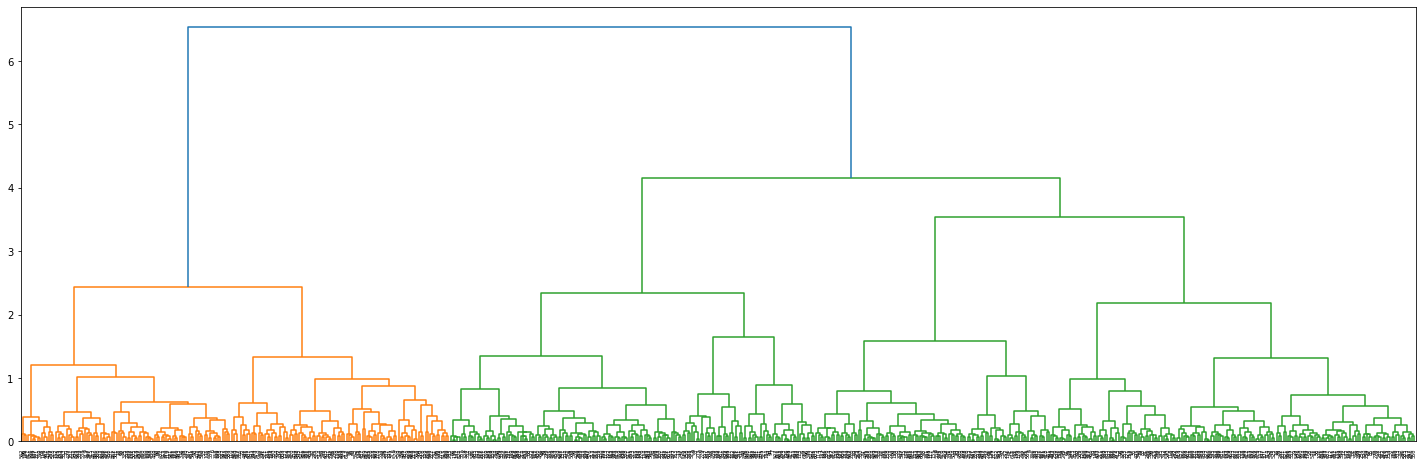

In [11]:
plt.figure(figsize=(25,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)
plt.show()

In [12]:
cluster = AgglomerativeClustering(n_clusters=2,
                                 affinity='euclidean',
                                 linkage='ward')
labels = cluster.fit_predict(df2)

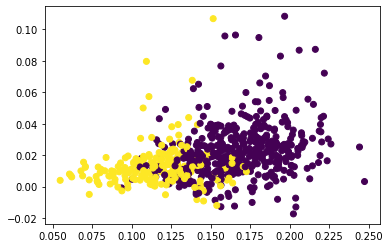

In [13]:
plt.scatter(df2['AGE'], df2['SPHEQ'], c=labels)
plt.show()

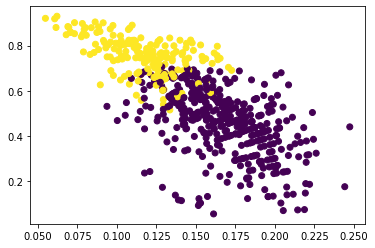

In [14]:
plt.scatter(df2['AGE'], df2['DIOPTERHR'], c=labels)
plt.show()

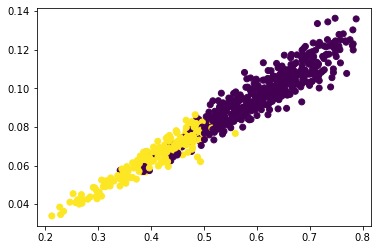

In [15]:
plt.scatter(df2['AL'], df2['ACD'], c=labels)
plt.show()

In [16]:
df2_scaled = StandardScaler().fit_transform(df2)
print(df2_scaled[0:5])

[[-1.67820149e+00 -1.23835965e+00 -1.63010060e+00 -1.41071845e+00
  -1.52315361e+00 -1.67773469e+00  2.74582563e+00  1.27645222e+00
  -8.52892973e-01 -8.31089937e-01 -3.94188443e-01 -9.57158713e-02
   2.50559612e-01  2.77098196e-01]
 [ 1.06843279e+00 -4.93847450e-02  1.27048776e+00  1.43450693e+00
   1.00415064e+00  1.27173961e+00 -9.08145500e-01 -1.08405999e+00
  -2.41935888e-01  4.87061345e-02  1.87100387e-01 -9.05667148e-01
   1.48266355e+00  1.52286957e+00]
 [ 4.12492766e-01  7.55527618e-01  6.16737479e-01  4.36352537e-01
   5.45086674e-01  6.67702198e-01  7.50662198e-01 -1.08405999e+00
   2.21915415e-01 -8.31089937e-01  6.98615024e-01 -8.53248700e-01
  -9.61451260e-01 -9.48357224e-01]
 [-9.88778100e-01 -5.76963190e-01 -8.84426474e-01 -5.38425816e-01
  -7.40011378e-01 -9.85110211e-01  5.29029577e-01  2.98984379e+00
  -8.52892973e-01 -8.31089937e-01 -1.09739405e+00  9.32415233e-01
  -9.61451260e-01  5.89795058e-01]
 [ 1.97695498e-03  7.19682910e-02  1.29505380e+00  1.20012418e+00
  

In [17]:
pca = PCA(n_components=2)

df2_pca = pca.fit_transform(df2_scaled)

In [18]:
df2_1 = pd.DataFrame(
    data=df2_pca, columns=["principal component 1", "principal component 2"]
)
df2_1.head()

,principal component 1,principal component 2
0,3.254889,-1.430219
1,-3.210751,0.253685
2,-1.525936,-1.591207
3,2.410396,1.333999
4,-3.231999,-0.984594


In [19]:
pca.explained_variance_ratio_

array([0.44452481, 0.10784344])

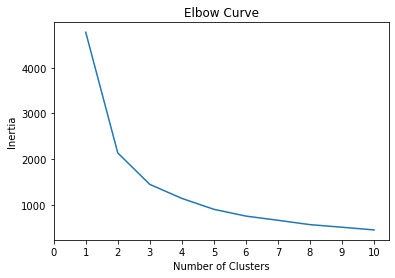

In [20]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df2_1)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
model = KMeans(n_clusters=3, random_state=0)

model.fit(df2_1)

predictions = model.predict(df2_1)

df2_1["class"] = model.labels_
df2_1.head()

,principal component 1,principal component 2,class
0,3.254889,-1.430219,2
1,-3.210751,0.253685,0
2,-1.525936,-1.591207,1
3,2.410396,1.333999,2
4,-3.231999,-0.984594,0


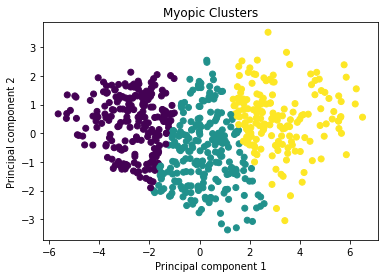

In [22]:
plt.scatter(x=df2_1['principal component 1'], y=df2_1['principal component 2'], c=df2_1['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopic Clusters')
plt.show()

In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [24]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(scaled_features)

/Users/anishachaudhari/.conda/envs/PythonData/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [25]:
tsne_features.shape

(618, 2)

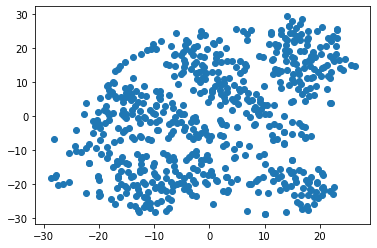

In [26]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

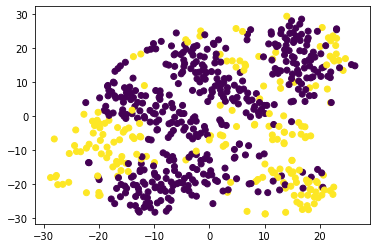

In [27]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show